In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'C:\Cursos\Analise_de_dados\Cases\SuperMarket Sales\supermarket_sales - Sheet1.csv')

In [3]:
data.rename(columns={
    'Invoice ID': 'Código do produto',
    'Branch': 'Filial',
    'City': 'Cidade',
    'Gender': 'Gênero',
    'Product line': 'Linha do produto',
    'Unit price': 'Preço Unitário',
    'Quantity': 'Quantidade',
    'Tax 5%': 'Taxa de 5%',
    'Total': 'Total da compra',
    'Date': 'Data',
    'Time': 'Horário',
    'Payment': 'Tipo do pagamento',
    'cogs': 'Custo bruto no valor total da venda',
    'gross margin percentage': 'Porcentagem em cima do valor da venda',
    'gross income': 'Lucro Bruto',
    'Rating': 'Nota do cliente'
    }, inplace=True)

In [4]:
# Quantidade de Vendas Por Filial
analise_filial = data.groupby(by=['Filial']).sum()['Quantidade'].reset_index()
analise_filial.sort_values('Quantidade', ascending=False).reset_index(drop=True)

,Filial,Quantidade
0,A,1859
1,C,1831
2,B,1820


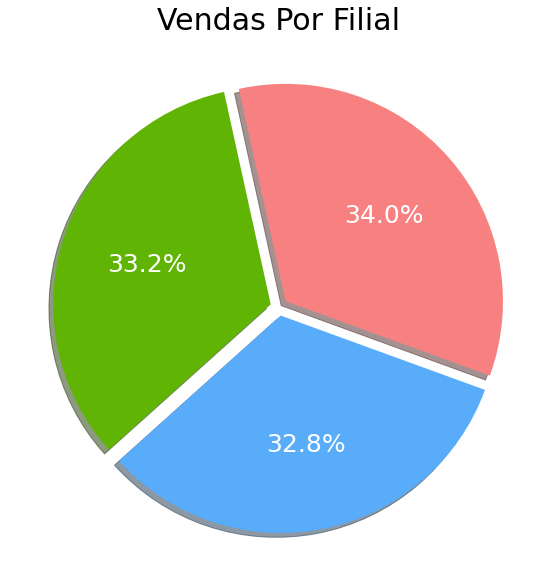

In [5]:
analise = round((data['Filial'].value_counts(normalize=True) * 100), 2)
plt.figure(figsize=(15, 10))
plt.title('Vendas Por Filial', loc= 'center', color='black', size=30)
plt.pie(
    analise.head(),
    labels=analise.index[:3],
    shadow=True,
    startangle=-20,
    autopct='%.1f%%',
    colors=['#F78181', '#5FB404', '#58ACFA'],
    explode=(0.04, 0.04, 0.04),
    textprops={'color': 'w', 'size': 25})
plt.show()


In [6]:
# Quantidade de Vendas e Valor Arrecadado Por Linha de Produto
data['Total da compra'] = pd.to_numeric(data['Total da compra'].apply(lambda line: round(line, 2)))
analise_genero = data.groupby(by=['Linha do produto']).sum()
analise_genero.loc[:, ('Quantidade', 'Total da compra')]

,Quantidade,Total da compra
Linha do produto,,
Electronic accessories,971,54337.50
Fashion accessories,902,54305.92
Food and beverages,952,56144.91
Health and beauty,854,49193.75
Home and lifestyle,911,53861.90
Sports and travel,920,55122.86


In [7]:
# Quantidade de Vendas Por Linha do Produto/Gênero(F)
analise_genero_f = data.groupby(by=['Linha do produto', 'Gênero']).sum()['Quantidade'].reset_index()
analise_genero_f = analise_genero_f.loc[analise_genero_f['Gênero'] == 'Female'].sort_values('Quantidade', ascending=False).reset_index(drop=True)
analise_genero_f

,Linha do produto,Gênero,Quantidade
0,Fashion accessories,Female,530
1,Food and beverages,Female,514
2,Home and lifestyle,Female,498
3,Sports and travel,Female,496
4,Electronic accessories,Female,488
5,Health and beauty,Female,343


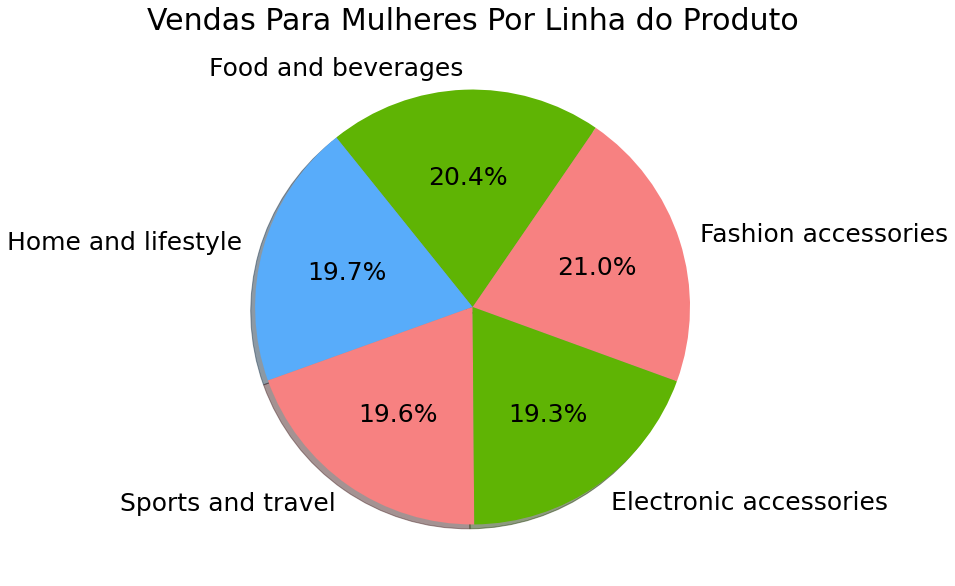

In [8]:
analise = round((analise_genero_f['Quantidade'] / analise_genero_f['Quantidade'].sum()) * 100, 2)
plt.figure(figsize=(15, 10))
plt.title('Vendas Para Mulheres Por Linha do Produto', loc= 'center', color='black', size=30)
plt.pie(
    analise.head(),
    labels=analise_genero_f['Linha do produto'][:5],
    shadow=True,
    startangle=-20,
    autopct='%.1f%%',
    colors=['#F78181', '#5FB404', '#58ACFA'],
    textprops={'color': 'black', 'size': 25})
plt.show()

In [9]:
# Quantidade de Vendas Por Linha do Produto/Gênero(M)
analise_genero_m = data.groupby(by=['Linha do produto', 'Gênero']).sum()['Quantidade'].reset_index()
analise_genero_m = analise_genero_m.loc[analise_genero_m['Gênero'] == 'Male'].sort_values('Quantidade', ascending=False).reset_index(drop=True)
analise_genero_m

,Linha do produto,Gênero,Quantidade
0,Health and beauty,Male,511
1,Electronic accessories,Male,483
2,Food and beverages,Male,438
3,Sports and travel,Male,424
4,Home and lifestyle,Male,413
5,Fashion accessories,Male,372


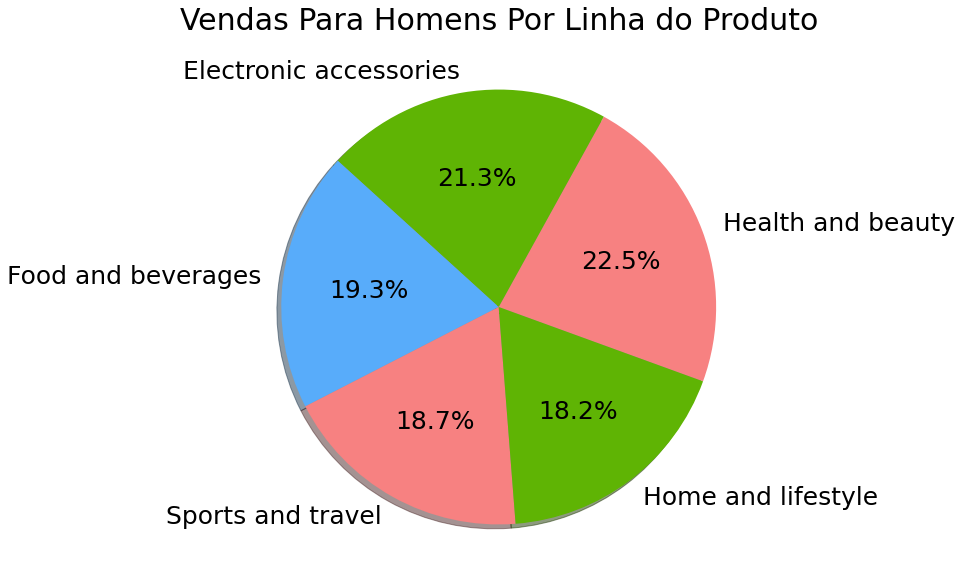

In [10]:
analise = round((analise_genero_m['Quantidade'] / analise_genero_m['Quantidade'].sum()) * 100, 2)
plt.figure(figsize=(15, 10))
plt.title('Vendas Para Homens Por Linha do Produto', loc= 'center', color='black', size=30)
plt.pie(
    analise.head(),
    labels=analise_genero_m['Linha do produto'][:5],
    shadow=True,
    startangle=-20,
    autopct='%.1f%%',
    colors=['#F78181', '#5FB404', '#58ACFA'],
    textprops={'color': 'black', 'size': 25})
plt.show()

In [11]:
# TOP 3 Linhas de Produtos Mais Vendidos Pela Filial A
analise_filial_a = data.groupby(by=['Filial', 'Linha do produto']).sum()['Quantidade'].reset_index()
analise_filial_a.loc[analise_filial_a['Filial'] == 'A'][:3].sort_values('Quantidade', ascending=False).reset_index(drop=True)

,Filial,Linha do produto,Quantidade
0,A,Electronic accessories,322
1,A,Food and beverages,313
2,A,Fashion accessories,263


In [12]:
# TOP 3 Linhas de Produtos Mais Vendidos Pela Filial B
analise_filial_b = data.groupby(by=['Filial', 'Linha do produto']).sum()['Quantidade'].reset_index()
analise_filial_b.loc[analise_filial_b['Filial'] == 'B'][:3].sort_values('Quantidade', ascending=False).reset_index(drop=True,)

,Filial,Linha do produto,Quantidade
0,B,Electronic accessories,316
1,B,Fashion accessories,297
2,B,Food and beverages,270


In [13]:
# TOP 3 Linhas de Produtos Mais Vendidos Pela Filial C
analise_filial_c = data.groupby(by=['Filial', 'Linha do produto']).sum()['Quantidade'].reset_index()
analise_filial_c.loc[analise_filial_c['Filial'] == 'C'][:3].sort_values('Quantidade', ascending=False).reset_index(drop=True)

,Filial,Linha do produto,Quantidade
0,C,Food and beverages,369
1,C,Fashion accessories,342
2,C,Electronic accessories,333


In [14]:
# Compras Por Gênero
analise_genero = data.groupby(by=['Gênero']).sum()['Quantidade'].reset_index()
analise_genero.sort_values('Quantidade', ascending=False).reset_index(drop=True)

,Gênero,Quantidade
0,Female,2869
1,Male,2641


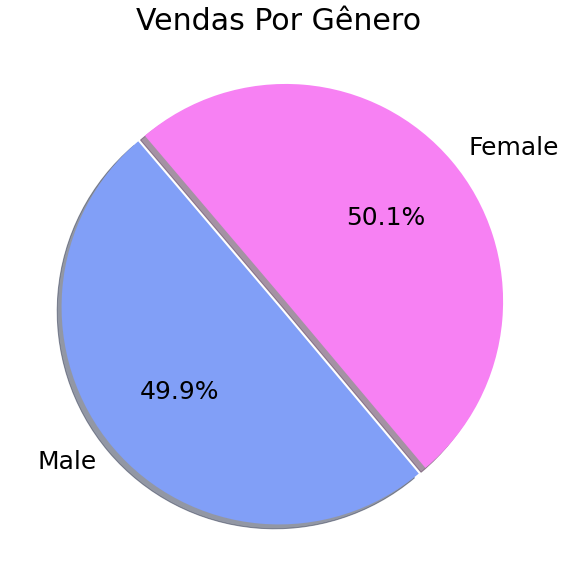

In [15]:
analise = round((data['Gênero'].value_counts(normalize=True) * 100), 2)
plt.figure(figsize=(15, 10))
plt.title('Vendas Por Gênero', loc= 'center', color='black', size=30)
plt.pie(
    analise.head(),
    labels=analise.index,
    shadow=True,
    startangle=-50,
    autopct='%.1f%%',
    explode=(0.04, 0),
    colors=['#F781F3', '#819FF7'],
    textprops={'color': 'black', 'size': 25})
plt.show()

In [16]:
# Quantidade de Vendas Por Gênero Mais Valor Arrecadado
data['Total da compra'] = pd.to_numeric(data['Total da compra'].apply(lambda line: round(line, 2)))
analise_genero = data.groupby(by=['Linha do produto', 'Gênero']).sum()
analise_genero.loc[:, ('Quantidade', 'Total da compra')]

Quantidade  Total da compra
Linha do produto       Gênero                             
Electronic accessories Female         488         27102.03
                       Male           483         27235.47
Fashion accessories    Female         530         30437.39
                       Male           372         23868.53
Food and beverages     Female         514         33170.92
                       Male           438         22973.99
Health and beauty      Female         343         18560.99
                       Male           511         30632.76
Home and lifestyle     Female         498         30036.88
                       Male           413         23825.02
Sports and travel      Female         496         28574.74
                       Male           424         26548.12

In [17]:
# Dias da Semana Com Mais Vendas
data['Dia'] = pd.DatetimeIndex(data['Data']).strftime('%a')
analise_semana = data.groupby(by=['Dia']).sum()['Quantidade'].reset_index()
analise_semana.sort_values('Quantidade', ascending=False).reset_index(drop=True)

,Dia,Quantidade
0,Sat,919
1,Tue,862
2,Wed,800
3,Sun,778
4,Fri,758
5,Thu,755
6,Mon,638


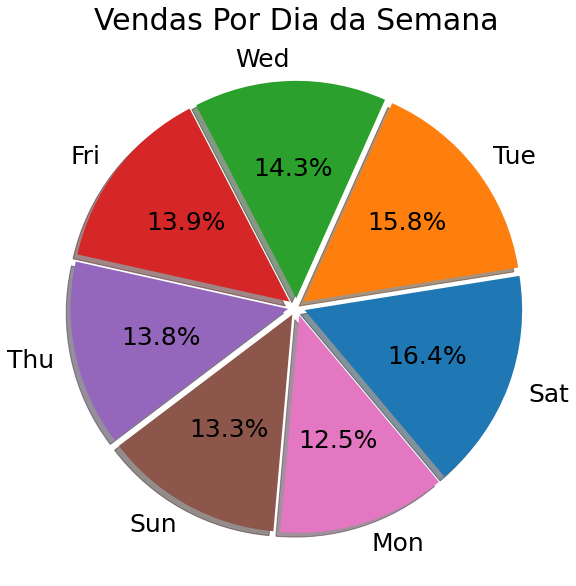

In [18]:
analise = round((data['Dia'].value_counts(normalize=True) * 100), 2)
plt.figure(figsize=(15, 10))
plt.title('Vendas Por Dia da Semana', loc= 'center', color='black', size=30)
plt.pie(
    analise.head(7),
    labels=analise.index[:7],
    shadow=True,
    startangle=-50,
    autopct='%.1f%%',
    explode=(0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04),
    textprops={'color': 'black', 'size': 25})
plt.show()

In [19]:
# Horários do Dia Que Mais Vendem
data['Hora'] = data['Horário'].apply(lambda line: str(line)[0:2])
analise_hr = data.groupby(by=['Hora']).sum()['Quantidade'].reset_index()
analise_hr.sort_values('Quantidade', ascending=False).reset_index(drop=True)

,Hora,Quantidade
0,19,649
1,13,585
2,15,530
3,10,525
4,11,513
5,12,501
6,14,495
7,18,475
8,16,420
9,17,415


In [20]:
# Hora do Dia Que Mais Vende Por Dia da Semana
data['Hora'] = data['Horário'].apply(lambda line: str(line)[0:2])
analise_hr = data.groupby(by=['Dia', 'Hora']).sum()['Quantidade'].reset_index()
filtro = analise_hr['Dia'] == 'Sat'
print(analise_hr.loc[filtro].sort_values('Quantidade', ascending=False).reset_index(drop=True),'\n\n TOTAL DE VENDAS:', analise_hr.loc[filtro].sum()['Quantidade'])

    Dia Hora  Quantidade
0   Sat   19         144
1   Sat   12          99
2   Sat   18          96
3   Sat   11          81
4   Sat   13          81
5   Sat   10          80
6   Sat   14          79
7   Sat   17          70
8   Sat   20          70
9   Sat   15          61
10  Sat   16          58 

 TOTAL DE VENDAS: 919


In [21]:
# Turno Com Mais Vendas
data['Turno'] = data['Horário'].apply(lambda line: 'Manhã 00:00 as 11:59' if line < '12:00' else 'Tarde/Noite 12:00 as 23:59')
analise_hr = data.groupby(by=['Turno']).sum()['Quantidade'].reset_index()
analise_hr.sort_values('Quantidade', ascending=False).reset_index(drop=True)

,Turno,Quantidade
0,Tarde/Noite 12:00 as 23:59,4472
1,Manhã 00:00 as 11:59,1038
